<a href="https://colab.research.google.com/github/negilbabu/NLP/blob/main/NLP_Assignment_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 2 Core Text Processing and Tool Comparison (NLTK & Spacy)

In [ ]:
!pip install streamlit nltk spacy matplotlib seaborn --quiet
!python -m nltk.downloader punkt wordnet punkt_tab --quiet
!python -m spacy download en_core_web_sm --quiet
!pip install streamlit pyngrok --quiet
!pip install -q streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.1 MB/s eta 0:00:00
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
%%writefile nlp_compare_app.py
from IPython import get_ipython
from IPython.display import display
import streamlit as st
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import spacy.cli
from nltk.corpus import stopwords


# Default text
default_text = """
I love exploring natural language processing with Python!
NLTK and SpaCy are both great tools for text processing.
Text preprocessing is essential for NLP tasks.
Tokenization splits text into smaller chunks.
Stemming reduces words to their root forms, but lemmatization is more accurate.
The weather is good.
I'm very disappointed with the customer service. It was terrible.
The new software update seems fine, nothing particularly exciting or bad.
I love coding, Its in my blood.
The last software update was so shit, nothing works properly.
"""

# NLTK setup
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("punkt_tab")
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
stop_words_nltk = set(stopwords.words('english'))
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")
stop_words_spacy = nlp.Defaults.stop_words

# Text processing for nltk
def process_nltk(texts):
    stemmed, lemmatized = [], []
    for text in texts:
        tokens = word_tokenize(text.lower())
        filtered = [word for word in tokens if word.isalpha() and word not in stop_words_nltk]
        stemmed.extend([stemmer.stem(word) for word in filtered])
        lemmatized.extend([lemmatizer.lemmatize(word) for word in filtered])
    return stemmed, lemmatized
# Text processing for spacy
def process_spacy(texts):
    lemmatized = []
    for text in texts:
        doc = nlp(text.lower())
        lemmatized.extend([token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words_spacy])
    return lemmatized

# Visualization
def plot_freq(tokens, title):
    freq = Counter(tokens)
    common = freq.most_common(10)
    df = pd.DataFrame(common, columns=["Token", "Frequency"])
    sns.set(style="whitegrid")
    fig, ax = plt.subplots()
    sns.barplot(x="Frequency", y="Token", data=df, ax=ax, palette="crest")
    ax.set_title(title)
    st.pyplot(fig)

# Streamlit UI
st.title("NLTK vs SpaCy - NLP Tool Comparison")

user_input = st.text_area("Enter text data (tweets, reviews, etc.):", height=200)

# Use input or default
text_data = user_input if user_input.strip() else default_text
text_lines = text_data.strip().split('\n')

if st.button("Process Text"):
    nltk_stemmed, nltk_lemmatized = process_nltk(text_lines)
    spacy_lemmatized = process_spacy(text_lines)

    st.subheader("🔍 Top 10 Token Frequencies")

    plot_freq(nltk_stemmed, "NLTK - Stemmed Tokens")
    plot_freq(nltk_lemmatized, "NLTK - Lemmatized Tokens")
    plot_freq(spacy_lemmatized, "SpaCy - Lemmatized Tokens")


Writing nlp_compare_app.py


In [ ]:
import os
import time
from pyngrok import ngrok
ngrok.set_auth_token("2vDrMfaNAiFpeQu8wobZiR0bHWm_21nb4YhieEicvoAKPoZHA")
ngrok.kill()
# Connect ngrok to Streamlit
public_url = ngrok.connect(8501)
print(f"Streamlit app is available at: {public_url}")

# Run Streamlit app
!streamlit run nlp_compare_app.py --server.port=8501 &

# Wait a bit for app to launch
time.sleep(5)


Streamlit app is available at: NgrokTunnel: "https://b05c-35-245-239-19.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.239.19:8501

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
2025-06-17 10:49:44.229 Examining the path of torch.classes raised:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/web/bootstrap.py", line 347, in run
    if asyncio.get_running_loop().is_running():
       ^

# Section 3, Named Entity Recognition and Sentiment Analysis

In [ ]:
!pip install transformers torch matplotlib seaborn pandas --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 838.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.8 MB/s eta 0:00:00



--- Named Entity Recognition (NER) Analysis ---


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


NER model 'dslim/bert-base-NER' loaded successfully.

--- NER Results Table ---
 Sentence ID                                                                                  Sentence              Entity Text Entity Type Confidence Score
           1  Chancellor Olaf Scholz will attend the AI Ethics Summit in Zurich on September 10, 2025.              Olaf Scholz         PER           0.9997
           1  Chancellor Olaf Scholz will attend the AI Ethics Summit in Zurich on September 10, 2025.         AI Ethics Summit        MISC           0.9971
           1  Chancellor Olaf Scholz will attend the AI Ethics Summit in Zurich on September 10, 2025.                   Zurich         LOC           0.9990
           2           NASA's Artemis III mission is scheduled to land astronauts on the Moon by 2026.                     NASA         ORG           0.9989
           2           NASA's Artemis III mission is scheduled to land astronauts on the Moon by 2026.              Artemis III        

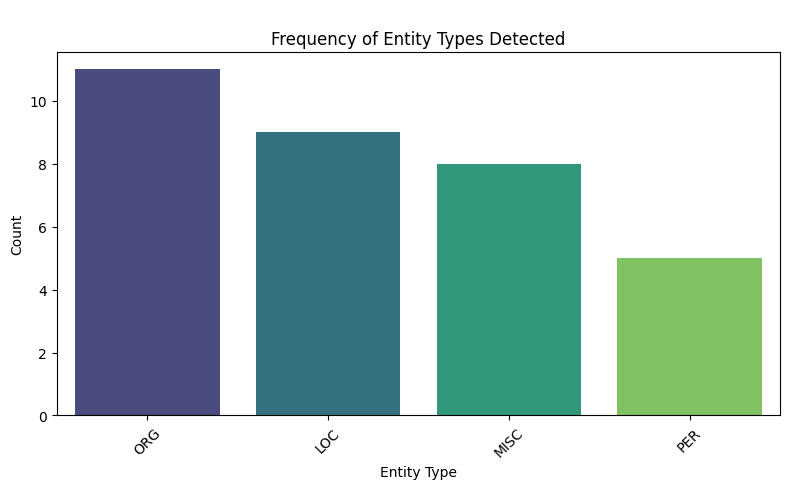

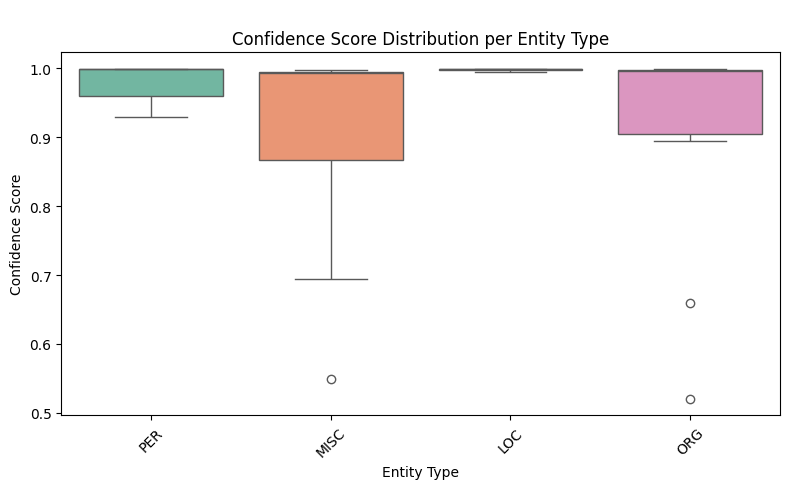

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from IPython.display import display, HTML


# -------------- Load NER Pipeline --------------- #
def load_ner_pipeline(model_name="dslim/bert-base-NER"):
    """
    Load the NER pipeline using a Hugging Face model.
    """
    try:
        ner = pipeline("ner", model=model_name,
                       tokenizer=model_name,
                       aggregation_strategy="simple")
        print(f"NER model '{model_name}' loaded successfully.")
        return ner
    except Exception as e:
        print(f"Error loading NER model: {e}")
        print("Ensure internet connection is active and model name is correct.")
        raise

# -------------- Process Sentences --------------- #
def extract_named_entities(sentences, ner):
    """
    Apply NER model on list of sentences and return structured entity results.
    """
    all_results = []
    for i, sentence in enumerate(sentences):
        entities = ner(sentence)
        sentence_entities = []

        if entities:
            for entity in entities:
                sentence_entities.append({
                    "Entity Text": entity['word'],
                    "Entity Type": entity['entity_group'],
                    "Confidence Score": f"{entity['score']:.4f}",
                    "Start Char": entity['start'],
                    "End Char": entity['end']
                })
        else:
            sentence_entities.append({
                "Entity Text": "No entities found",
                "Entity Type": "N/A",
                "Confidence Score": "N/A",
                "Start Char": "N/A",
                "End Char": "N/A"
            })

        all_results.append({
            "Sentence_ID": i + 1,
            "Sentence": sentence,
            "Entities_Detected": sentence_entities
        })
    return all_results

# ------------- Convert to DataFrame ---------------- #
def results_to_dataframe(results):
    """
    Convert NER results to a flat pandas DataFrame for display and plotting.
    """
    rows = []
    for result in results:
        for entity_info in result["Entities_Detected"]:
            rows.append({
                "Sentence ID": result["Sentence_ID"],
                "Sentence": result["Sentence"],
                "Entity Text": entity_info["Entity Text"],
                "Entity Type": entity_info["Entity Type"],
                "Confidence Score": entity_info["Confidence Score"]
            })
    df = pd.DataFrame(rows)
    return df

# -------------- Plotting --------------- #
def plot_entity_type_distribution(df):
    """
    Plot the frequency of each entity type detected.
    """
    plt.figure(figsize=(8, 5))
    entity_type_counts = df['Entity Type'].value_counts()
    entity_df = entity_type_counts.reset_index()
    entity_df.columns = ["Entity Type", "Count"]
    sns.barplot(data=entity_df, x="Entity Type", y="Count", hue="Entity Type", palette="viridis", legend=False)
    plt.title("\nFrequency of Entity Types Detected")
    plt.xlabel("Entity Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_confidence_distribution(df):
    """
    Plot confidence scores per entity type using boxplot.
    """
    df_filtered = df[df['Confidence Score'] != "N/A"].copy()
    df_filtered["Confidence Score"] = df_filtered["Confidence Score"].astype(float)

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_filtered, x="Entity Type", y="Confidence Score", palette="Set2", hue="Entity Type", legend=False)
    plt.title("\nConfidence Score Distribution per Entity Type")
    plt.xlabel("Entity Type")
    plt.ylabel("Confidence Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    print("\n--- Named Entity Recognition (NER) Analysis ---")

    # Sample sentences
    custom_sentences = [
        "Chancellor Olaf Scholz will attend the AI Ethics Summit in Zurich on September 10, 2025.",
        "NASA's Artemis III mission is scheduled to land astronauts on the Moon by 2026.",
        "The Berlin Philharmonic performed Beethoven’s 9th Symphony at Carnegie Hall, New York.",
        "OpenAI's GPT-5 model is being tested at Stanford University's NLP lab.",
        "The International Space Station (ISS) has been continuously occupied since November 2000.",
        "Meta launched its new virtual reality platform, Horizon Worlds, in 2023.",
        "Dr. Aisha Rahman received the Lasker Award for her breakthrough in cancer immunotherapy.",
        "Spotify signed an exclusive podcast deal with Trevor Noah in Stockholm.",
        "Volvo’s electric truck plant in Ghent, Belgium, began operations last March.",
        "The COP30 Climate Conference will be hosted in Rio de Janeiro, Brazil, in 2025."
    ]

    # Load model
    ner_model = load_ner_pipeline()

    # Run NER
    results = extract_named_entities(custom_sentences, ner_model)

    # Convert results to DataFrame
    df = results_to_dataframe(results)

    # Show full table
    print("\n--- NER Results Table ---")
    pd.set_option('display.max_colwidth', None)
    print(df.to_string(index=False))
    display(HTML("<br><br><br>"))

    # Plotting
    plot_entity_type_distribution(df)
    plot_confidence_distribution(df)


if __name__ == "__main__":
    main()


In [ ]:
!pip install datasets




--- Starting Sentiment Analysis Task ---


Device set to use cpu


Sentiment analysis model 'cardiffnlp/twitter-roberta-base-sentiment' loaded successfully.

--- Sample from Dataset ---
   idx                                         sentence  label
0    1  The story was very sad. I hate I saw the movie.     -1
1    2     I loved the characters! Amazing performance.      1
2    3   That's totally wrong! How can you be so silly?     -1
3    4         I love your products. They are the best.      1
4    5               Two hours and twenty five minutes.      0

--- Sentiment Analysis Results Table ---
 idx                                        sentence True Sentiment Predicted Sentiment Confidence Score
   1 The story was very sad. I hate I saw the movie.       Negative            Negative           0.9807
   2    I loved the characters! Amazing performance.       Positive            Positive           0.9907
   3  That's totally wrong! How can you be so silly?       Negative            Negative           0.9713
   4        I love your products. They ar

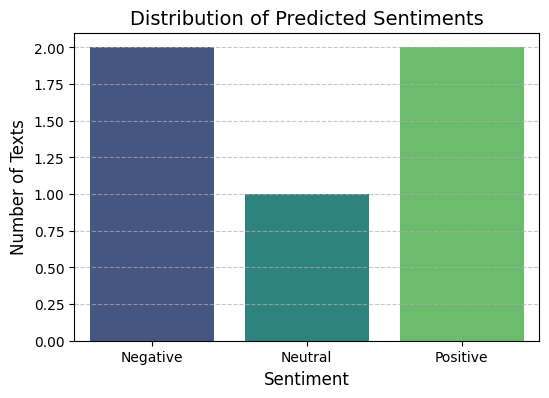

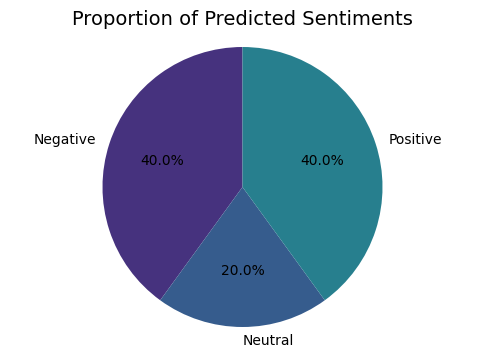

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from IPython.display import display, HTML
from datasets import load_dataset

# Load the sentiment model
def load_sentiment_model(model_name="cardiffnlp/twitter-roberta-base-sentiment"):
    print("\n\n--- Starting Sentiment Analysis Task ---")
    try:
        sentiment_pipeline = pipeline("sentiment-analysis",
                                      model=model_name,
                                      tokenizer=model_name)
        print(f"Sentiment analysis model '{model_name}' loaded successfully.")
        return sentiment_pipeline
    except Exception as e:
        print(f"Error loading sentiment model: {e}")
        print("Please ensure you have an active internet connection and the model name is correct.")
        exit()

# Analyze sentiment using model pipeline
def analyze_sentiment(pipeline_func, texts):
    results = pipeline_func(texts)
    sentiment_data = []
    for i, (text, result) in enumerate(zip(texts, results)):
        sentiment_data.append({
            "Text ID": i + 1,
            "Text": text,
            "Predicted Sentiment Raw": result['label'],
            "Confidence Score": f"{result['score']:.4f}"
        })
    return pd.DataFrame(sentiment_data)

# Map raw model output to human-readable labels
def map_sentiment_labels(df):
    label_mapping = {
        'LABEL_0': 'Negative',
        'LABEL_1': 'Neutral',
        'LABEL_2': 'Positive'
    }
    df['Predicted Sentiment'] = df['Predicted Sentiment Raw'].map(label_mapping)
    return df

# Display the sentiment results in a table
def display_sentiment_table(df):
    print("\n--- Sentiment Analysis Results Table ---")
    print(df[['idx', 'sentence', 'True Sentiment', 'Predicted Sentiment', 'Confidence Score']].to_string(index=False))



# Plot distribution of predicted sentiments
def plot_sentiment_distribution(df):
    sentiment_counts = df['Predicted Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']

    sentiment_order = ['Negative', 'Neutral', 'Positive']
    sentiment_counts['Sentiment'] = pd.Categorical(sentiment_counts['Sentiment'], categories=sentiment_order, ordered=True)
    sentiment_counts = sentiment_counts.sort_values('Sentiment')

    display(HTML("<br><br><br>"))
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Sentiment', y='Count', data=sentiment_counts, palette='viridis', hue='Sentiment', legend=False, order=sentiment_order)
    plt.title('Distribution of Predicted Sentiments', fontsize=14)
    plt.xlabel('Sentiment', fontsize=12)
    plt.ylabel('Number of Texts', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    display(HTML("<br><br><br>"))
    plt.figure(figsize=(6, 4))
    plt.pie(sentiment_counts['Count'], labels=sentiment_counts['Sentiment'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis')[:len(sentiment_counts)])
    plt.title('Proportion of Predicted Sentiments', fontsize=14)
    plt.axis('equal')
    plt.show()

# Main function
def main():
    sentiment_pipeline = load_sentiment_model()

    # Load dataset from Hugging Face Hub (via local redirect link or local cache)
    df = pd.read_csv("hf://datasets/mtkinit/AI4Copernicus-Small-Sentiment-Dataset/data/short-sentiment.csv")

    # Optional: Preview the dataset
    print("\n--- Sample from Dataset ---")
    print(df.head())

    # Map ground truth numeric labels to readable form
    label_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
    df['True Sentiment'] = df['label'].map(label_map)

    # Run sentiment prediction on the text data
    analyzed_df = analyze_sentiment(sentiment_pipeline, df['sentence'].tolist())


    # Merge predictions with original dataframe
    final_df = pd.concat([df.reset_index(drop=True), analyzed_df[['Predicted Sentiment Raw', 'Confidence Score']]], axis=1)

    # Map model output to readable labels
    final_df = map_sentiment_labels(final_df)

    # Display table and visualizations
    display_sentiment_table(final_df)
    plot_sentiment_distribution(final_df)

# Run main
main()


# Section 4

In [ ]:
!pip install transformers torch pandas matplotlib seaborn scikit-learn --quiet

In [ ]:
!pip install nltk spacy pandas --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.0 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.0 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.0 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [ ]:
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.11/dist-packages/cupyx/scipy/sparse/_base.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.0)
  import scipy.sparse as _sparse
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install gensim --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [ ]:
!pip install --upgrade --force-reinstall numpy==1.23.5 gensim==4.3.1 scipy==1.10.1 --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
xarray-einstats 0.9.0 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray-einstats 0.9.0 requires scipy>=1.11, but you have scipy 1.10.1 which is incompatible.
chex 0.1.89 req

In [ ]:
# Run this code snippet two times
!pip install --upgrade numpy
!pip install --upgrade gensim
!pip install --force-reinstall numpy
!pip install --upgrade gensim

  Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.3.0 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.0 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
xarray-einstats 0.9.0 requires scipy>=1.11, but you have scipy 1.10.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.0 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 

^C


In [ ]:
!pip uninstall -y gensim numpy scipy --quiet
!pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.1 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 73.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.2

In [ ]:
!pip install gensim --quiet
!pip install --upgrade --force-reinstall numpy==1.23.5 gensim==4.3.1 --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.

In [ ]:
# Run this in a new cell
!pip install --upgrade numpy --quiet
!pip install --upgrade gensim --quiet
!pip install --force-reinstall numpy --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 36.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.0 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.2 MB/s e

In [ ]:
!pip install --upgrade gensim --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
xarray-einstats 0.9.0 requires scipy>=1.11, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
cvxpy 1.6.6 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.10.1 which is incompatible.


In [ ]:
# 1. Uninstall all conflicting packages
!pip uninstall -y numpy scipy gensim

# 2. Install versions that work well together
!pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.1


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
ERROR: pip's dependency resolver does not currently take into account all 

In [ ]:
!pip uninstall -y numpy scipy
!pip install numpy==1.23.5 scipy==1.10.1


Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2

In [ ]:
import nltk

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True



--- CBOW MODEL ---

Cosine similarity between 'learning' and 'intelligence': -0.0237

Top 5 similar words to 'intelligence':
achieved        -> 0.1886
human           -> 0.1608
semantic        -> 0.1592
vision          -> 0.1373
remarkable      -> 0.1279


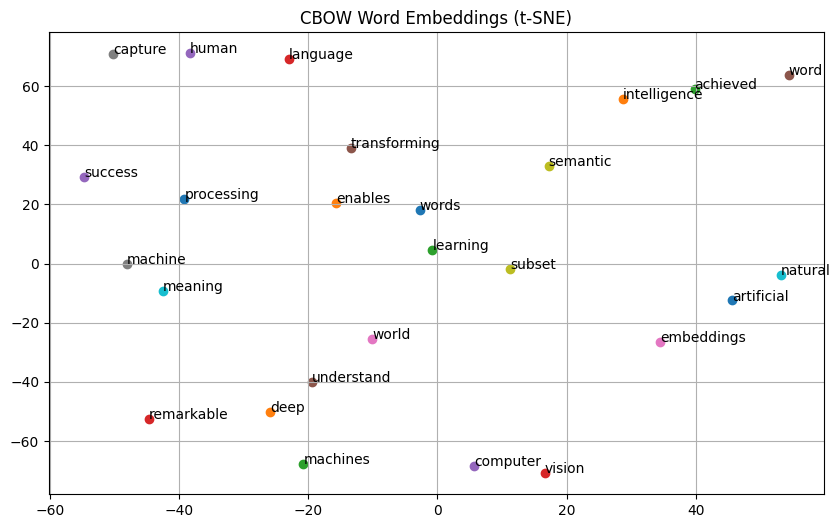



--- SKIP-GRAM MODEL ---

Cosine similarity between 'learning' and 'intelligence': -0.0237

Top 5 similar words to 'intelligence':
achieved        -> 0.1886
human           -> 0.1608
semantic        -> 0.1592
vision          -> 0.1373
remarkable      -> 0.1279


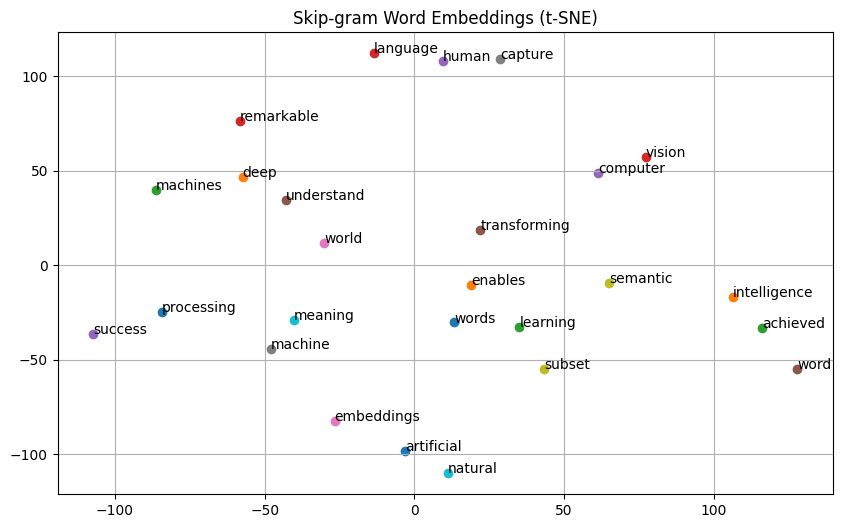

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

stop_words = set(stopwords.words('english'))

# Sample corpus
corpus = [
    "Artificial intelligence is transforming the world.",
    "Machine learning is a subset of artificial intelligence.",
    "Natural language processing enables machines to understand human language.",
    "Word embeddings capture semantic meaning of words.",
    "Deep learning has achieved remarkable success in computer vision."
]

def visualize_embeddings(model, words=None, title="Word Embeddings"):
    # Select words: either provided list or all in vocab
    if words is None:
        words = list(model.wv.index_to_key)[:50]  # Limit for readability

    word_vectors = [model.wv[word] for word in words]
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    import numpy as np
    word_vec_2d = tsne.fit_transform(np.array(word_vectors))

    plt.figure(figsize=(10, 6))
    for i, word in enumerate(words):
        plt.scatter(word_vec_2d[i, 0], word_vec_2d[i, 1])
        plt.annotate(word, xy=(word_vec_2d[i, 0], word_vec_2d[i, 1]))
    plt.title(title)
    plt.grid(True)
    plt.show()

def preprocess_corpus(corpus):
    """Tokenize, lowercase, and remove stopwords and punctuation"""
    processed = []
    for sentence in corpus:
        tokens = word_tokenize(sentence.lower())
        filtered = [word for word in tokens if word not in stop_words and word not in string.punctuation]
        processed.append(filtered)
    return processed

def train_word2vec_model(tokenized_corpus, vector_size=100, window=5, min_count=1, sg=1):
    """Train Word2Vec model with specified parameters"""
    return Word2Vec(sentences=tokenized_corpus,
                    vector_size=vector_size,
                    window=window,
                    min_count=min_count,
                    sg=sg)

def calculate_cosine_similarity(model, word1, word2):
    """Calculate cosine similarity between two words"""
    if word1 not in model.wv or word2 not in model.wv:
        return None
    vec1 = model.wv[word1].reshape(1, -1)
    vec2 = model.wv[word2].reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0][0]

def display_similar_words(model, target_word, topn=5):
    """Display top-N similar words to the target word"""
    if target_word not in model.wv:
        print(f"Word '{target_word}' not found in vocabulary.")
        return
    similar_words = model.wv.most_similar(target_word, topn=topn)
    print(f"\nTop {topn} similar words to '{target_word}':")
    for word, score in similar_words:
        print(f"{word:15} -> {score:.4f}")

def run_analysis(corpus, word_pair=("learning", "intelligence"), target_word="intelligence"):
    """Run analysis for both CBOW and Skip-gram models"""
    tokenized = preprocess_corpus(corpus)

    for model_type, sg in [("CBOW", 0), ("Skip-gram", 1)]:
        print(f"\n\n--- {model_type.upper()} MODEL ---")
        model = train_word2vec_model(tokenized, sg=sg)

        # Cosine similarity
        similarity = calculate_cosine_similarity(model, word_pair[0], word_pair[1])
        if similarity is not None:
            print(f"\nCosine similarity between '{word_pair[0]}' and '{word_pair[1]}': {similarity:.4f}")
        else:
            print(f"\nOne or both words not in vocabulary: {word_pair}")

        # Similar words
        display_similar_words(model, target_word)
        visualize_embeddings(model, title=f"{model_type} Word Embeddings (t-SNE)")


# Run main analysis
if __name__ == "__main__":
    run_analysis(corpus)


# Section 5, Mini NLP Project - Text Classification.


> Dataset = Product Reviews.



> Link = https://huggingface.co/datasets/ml-hub/flipkart-reviews/viewer/default/train?views%5B%5D=train


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def import_dataset():
  splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
  df = pd.read_parquet("hf://datasets/ml-hub/flipkart-reviews/" + splits["train"])
  return df

df = import_dataset()

In [ ]:
df.head()

,product_name,product_price,Rate,Review,text,labels,sentiment_code
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,5.0,super!,great cooler excellent air flow and for this p...,positive,2
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,5.0,awesome,best budget 2 fit cooler nice cooling,positive,2
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,3.0,fair,the quality is good but the power of air is de...,positive,2
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,1.0,useless product,very bad product its a only a fan,negative,0
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999.0,3.0,fair,ok ok product,neutral,1


In [ ]:
df.describe()

,product_price,Rate,sentiment_code
count,29999.000000,29999.000000,30000.000000
mean,6565.594486,4.093903,1.665067
std,10261.519607,1.330313,0.715381
min,59.000000,1.000000,0.000000
25%,699.000000,4.000000,2.000000
50%,1599.000000,5.000000,2.000000
75%,7599.000000,5.000000,2.000000
max,52990.000000,5.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    30000 non-null  object 
 1   product_price   29999 non-null  float64
 2   Rate            29999 non-null  float64
 3   Review          30000 non-null  object 
 4   text            30000 non-null  object 
 5   labels          30000 non-null  object 
 6   sentiment_code  30000 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
df.shape

(30000, 7)

In [ ]:
def check_null_values(df):
  print("Checking for null values...")
  count = df.isnull().sum()
  for col, null_count in count.items():
      if null_count > 0:
          print(f"Column '{col}' has {null_count} null values. Removing null values...")
          df = df.dropna(subset=[col])
      else:
          print(f"Column '{col}' has no null values.")
  print("Shape of dataframe", df.shape)
  return df

df = check_null_values(df)

Checking for null values...
Column 'product_name' has no null values.
Column 'product_price' has 1 null values. Removing null values...
Column 'Rate' has 1 null values. Removing null values...
Column 'Review' has no null values.
Column 'text' has no null values.
Column 'labels' has no null values.
Column 'sentiment_code' has no null values.
Shape of dataframe (29999, 7)


In [ ]:
def check_duplicates(df):
  print("Checking for duplicated rows...")
  duplicated_rows = df.duplicated()
  print(f"Total duplicated rows: {duplicated_rows.sum()}")

  if duplicated_rows.any():
      df = df.drop_duplicates()
      return df
  else:
      print("No duplicated rows found.")
      return df

df = check_duplicates(df)
print("Shape of dataframe after removing duplicates", df.shape)

Checking for duplicated rows...
Total duplicated rows: 3228
Shape of dataframe after removing duplicates (26771, 7)


In [ ]:
df['labels'].nunique()

3

In [ ]:
df['labels'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

labels
positive    79.414292
negative    15.606440
neutral      4.979269
Name: count, dtype: float64


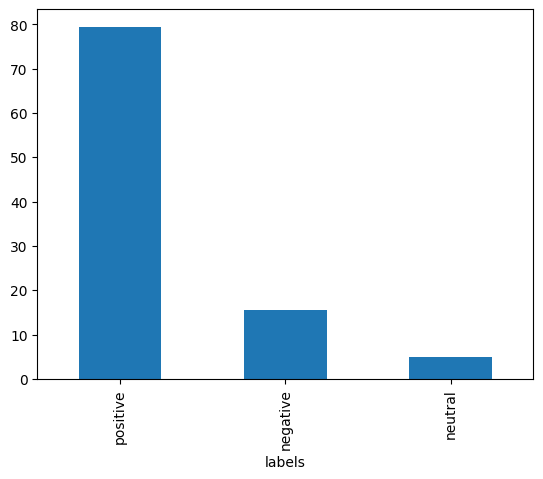

In [ ]:
rating_pct = df['labels'].value_counts()/len(df) * 100
print(rating_pct)

rating_pct.plot.bar()
plt.show()

Here we can see difference in the distribution of labels. almost 80% are positive, 15% negative and nearly 5% of neutral labels in the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

# ------------------ Text Preprocessing ------------------ #
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.lower().strip()

df['clean_text'] = df['text'].apply(clean_text)

# ------------------ Label Encoding ------------------ #
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['labels'])

# ------------------ Vectorization ------------------ #
# TF-IDF for Logistic Regression and SVM
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df['clean_text'])

# CountVectorizer for Naive Bayes
count_vec = CountVectorizer(max_features=5000, ngram_range=(1, 2))
X_count = count_vec.fit_transform(df['clean_text'])

y = df['label_encoded']

# ------------------ Train-Test Split ------------------ #
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)
X_count_train, X_count_test, _, _ = train_test_split(X_count, y, test_size=0.2, stratify=y, random_state=42)

# ------------------ Apply SMOTE ------------------ #
smote = SMOTE(random_state=42)
X_tfidf_train_smote, y_train_smote = smote.fit_resample(X_tfidf_train, y_train)
X_count_train_smote, _ = smote.fit_resample(X_count_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression:
               precision    recall  f1-score   support

    negative       0.82      0.84      0.83       836
     neutral       0.40      0.66      0.50       267
    positive       0.97      0.93      0.95      4252

    accuracy                           0.90      5355
   macro avg       0.73      0.81      0.76      5355
weighted avg       0.92      0.90      0.91      5355

Macro F1 (Logistic Regression): 0.7599429380761838


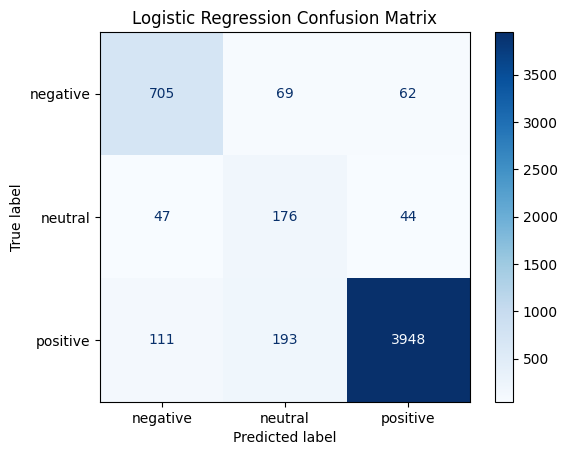


Naive Bayes:
               precision    recall  f1-score   support

    negative       0.76      0.78      0.77       836
     neutral       0.41      0.53      0.46       267
    positive       0.96      0.93      0.94      4252

    accuracy                           0.89      5355
   macro avg       0.71      0.75      0.72      5355
weighted avg       0.90      0.89      0.89      5355

Macro F1 (Naive Bayes): 0.7244921837872519


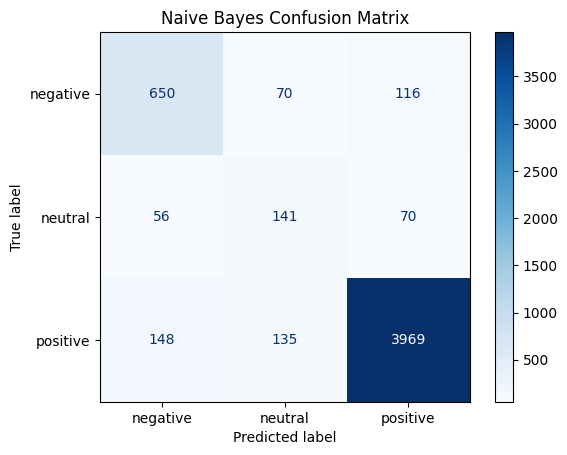


SVM:
               precision    recall  f1-score   support

    negative       0.81      0.82      0.81       836
     neutral       0.36      0.59      0.45       267
    positive       0.97      0.93      0.95      4252

    accuracy                           0.89      5355
   macro avg       0.71      0.78      0.74      5355
weighted avg       0.91      0.89      0.90      5355

Macro F1 (SVM): 0.7354450498441468


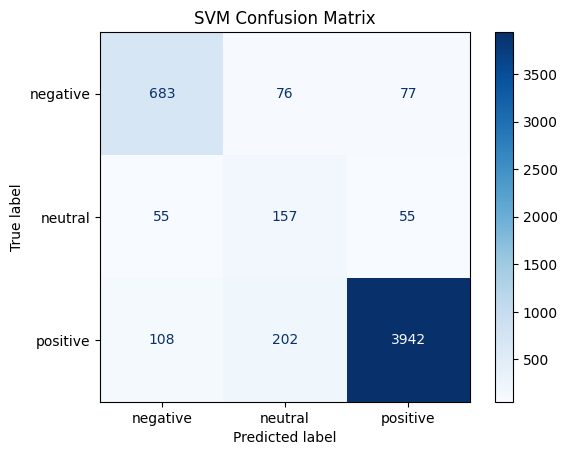

In [ ]:
# ------------------ Model Training ------------------ #
# Logistic Regression
lr = LogisticRegression(multi_class='ovr', max_iter=1000)
lr.fit(X_tfidf_train_smote, y_train_smote)
y_pred_lr = lr.predict(X_tfidf_test)

# Naive Bayes (CountVectorizer + SMOTE)
nb = MultinomialNB()
nb.fit(X_count_train_smote, y_train_smote)
y_pred_nb = nb.predict(X_count_test)

# SVM
svm = LinearSVC()
svm.fit(X_tfidf_train_smote, y_train_smote)
y_pred_svm = svm.predict(X_tfidf_test)

# ------------------ Evaluation Functions ------------------ #
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}:\n", classification_report(y_true, y_pred, target_names=label_encoder.classes_))
    print(f"Macro F1 ({name}):", f1_score(y_true, y_pred, average='macro'))

def plot_conf_matrix(name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# ------------------ Evaluation ------------------ #
evaluate_model("Logistic Regression", y_test, y_pred_lr)
plot_conf_matrix("Logistic Regression", y_test, y_pred_lr)

evaluate_model("Naive Bayes", y_test, y_pred_nb)
plot_conf_matrix("Naive Bayes", y_test, y_pred_nb)

evaluate_model("SVM", y_test, y_pred_svm)
plot_conf_matrix("SVM", y_test, y_pred_svm)


In [ ]:
!pip install --upgrade transformers huggingface-hub diffusers peft sentence-transformers accelerate gradio gradio-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.8/514.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 134.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Install dependencies
!pip install transformers datasets -q

In [ ]:
!pip install numpy==1.26.4 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 130.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import transformers, huggingface_hub
print("transformers:", transformers.__version__)
print("huggingface_hub:", huggingface_hub.__version__)


transformers: 4.52.4
huggingface_hub: 0.33.0


Checking for null values...
Column 'product_name' has no null values.
Column 'product_price' has 1 null values. Removing null values...
Column 'Rate' has 1 null values. Removing null values...
Column 'Review' has no null values.
Column 'text' has no null values.
Column 'labels' has no null values.
Column 'sentiment_code' has no null values.
Shape of dataframe (29999, 7)
Checking for duplicated rows...
Total duplicated rows: 3228


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


=== Full Test Set Evaluation ===
              precision    recall  f1-score   support

    negative       0.80      0.85      0.82      4178
     neutral       0.20      0.57      0.29      1333
    positive       0.98      0.85      0.91     21260

    accuracy                           0.84     26771
   macro avg       0.66      0.76      0.68     26771
weighted avg       0.91      0.84      0.87     26771

Macro F1-score (Full Test Set): 0.6751


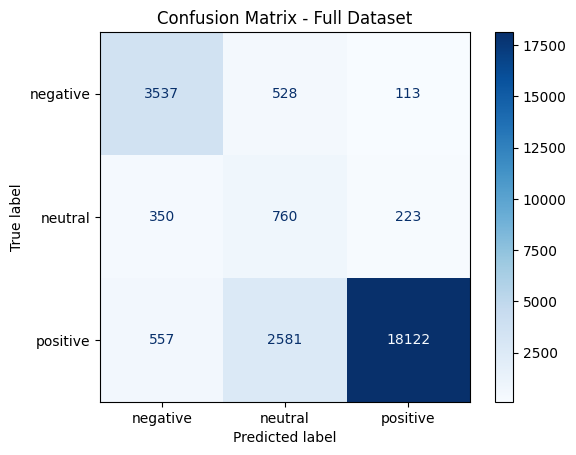


=== Balanced Subset Evaluation (300 per class) ===
              precision    recall  f1-score   support

    negative       0.78      0.85      0.81       300
     neutral       0.75      0.64      0.69       300
    positive       0.83      0.87      0.85       300

    accuracy                           0.79       900
   macro avg       0.78      0.79      0.78       900
weighted avg       0.78      0.79      0.78       900

Macro F1-score (Balanced Subset): 0.7833


<ipython-input-6-1396650855>:74: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('label_encoded', group_keys=False).apply(lambda x: x.sample(n=300, random_state=42))


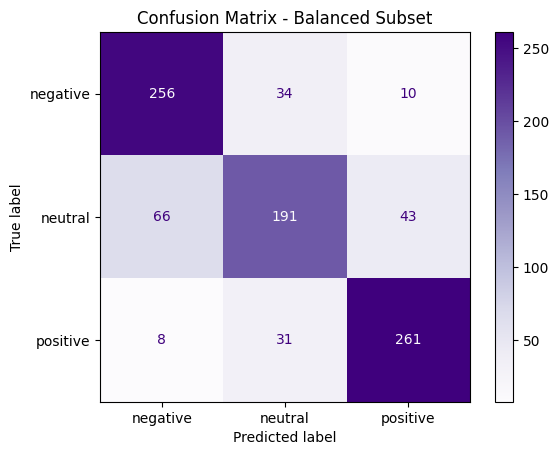

In [ ]:
import pandas as pd
import re
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay

df = import_dataset()
df = check_null_values(df)
df = check_duplicates(df)

# ------------------ Preprocessing ------------------ #

# Clean text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.lower().strip()

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Encode true labels
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['labels'])  # 0=negative, 1=neutral, 2=positive

# ------------------ Load Pretrained Model ------------------ #

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL).to("cuda")

# Define label mapping
sentiment_labels = ['negative', 'neutral', 'positive']

# ------------------ Prediction function ------------------ #

def get_sentiment(text):
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True).to("cuda")
    with torch.no_grad():
        output = model(**encoded_input)
    scores = softmax(output.logits.cpu().numpy()[0])
    pred_label = sentiment_labels[scores.argmax()]
    return pred_label

# Predict all
df['predicted_label'] = df['clean_text'].apply(get_sentiment)

# Encode predicted labels
df['pred_encoded'] = label_encoder.transform(df['predicted_label'])

# ------------------ Evaluation ------------------ #

print("=== Full Test Set Evaluation ===")
print(classification_report(df['label_encoded'], df['pred_encoded'], target_names=label_encoder.classes_))

# Macro F1-score (treats all classes equally)
macro_f1 = f1_score(df['label_encoded'], df['pred_encoded'], average='macro')
print("Macro F1-score (Full Test Set):", round(macro_f1, 4))

# Confusion Matrix (full dataset)
cm = confusion_matrix(df['label_encoded'], df['pred_encoded'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Full Dataset")
plt.show()

# ------------------ Balanced Subset Evaluation ------------------ #

# Take a balanced sample (e.g., 300 from each class)
df_balanced = df.groupby('label_encoded', group_keys=False).apply(lambda x: x.sample(n=300, random_state=42))

print("\n=== Balanced Subset Evaluation (300 per class) ===")
print(classification_report(df_balanced['label_encoded'], df_balanced['pred_encoded'], target_names=label_encoder.classes_))

# Macro F1-score on balanced data
macro_f1_bal = f1_score(df_balanced['label_encoded'], df_balanced['pred_encoded'], average='macro')
print("Macro F1-score (Balanced Subset):", round(macro_f1_bal, 4))

# Confusion Matrix (balanced subset)
cm_bal = confusion_matrix(df_balanced['label_encoded'], df_balanced['pred_encoded'])
disp_bal = ConfusionMatrixDisplay(confusion_matrix=cm_bal, display_labels=label_encoder.classes_)
disp_bal.plot(cmap='Purples')
plt.title("Confusion Matrix - Balanced Subset")
plt.show()
